In [1]:
# IBM_QISKIT_BACKEND.ipynb: Tools for accessing IBM Quantum Resources using qiskit

In [16]:
from qiskit               import QuantumCircuit       # QuantumCircuit
from qiskit               import __qiskit_version__   # __qiskit_version__
from qiskit.visualization import plot_histogram       # plot_histogram
from qiskit_ibm_runtime   import QiskitRuntimeService # QiskitRuntimeService
from qiskit_ibm_runtime   import Sampler              # Sampler
from qiskit_ibm_provider  import IBMProvider          # IBMProvider, save_account(), backends()
from pandas               import DataFrame            # DataFrame
from random               import choice               # choice()

In [3]:
# CONSTANTS
ACCOUNT_SAVED_TO_DISK = True
TOKEN = '' # THIS IS EMPTY FOR SECURITY PURPOSES - USE, THEN REMOVE, TOKEN FROM IBM ACCOUNT IF NECESSARY

In [4]:
# Function Definitions
def GetIbmQuantumProvider() -> IBMProvider:
    # GetIbmQuantumProvider(): Save Token, if necessary, and Return IBMProvider object for Saved Token
    # Implementation: IBMProvider Constructor and save_account() method
    # REF: # https://qiskit.org/ecosystem/ibm-provider/stubs/qiskit_ibm_provider.IBMProvider.html#ibmprovider
    if not ACCOUNT_SAVED_TO_DISK:
        IBMProvider.save_account(token=TOKEN) # Save account credentials.
    oAccountProvider = IBMProvider() # Authenticate against IBM Quantum for use from saved credentials or during session
    #print(f'oAccountProvider: {oAccountProvider}')
    #print( f'\ntype(oAccountProvider): {type(oAccountProvider)}')
    return oAccountProvider
def MakeBackEndsDF(oProvider:IBMProvider) -> DataFrame:
    # MakeBackEndsDF(): Return DataFrame of Useful Information about Available Backends
    # Impementation: Iterate on oProvider.backends(); Pandas DataFrame, sort_values() for returned DF
    vBackendObjs  = oProvider.backends() # Vector of Backend Objects
    vBackendDicts = []  # Vector of Backend Dictionaries
    for oBackend in vBackendObjs:
        dictBackendInfo = {'NAME':oBackend.name, 'SIM': oBackend.simulator}
        vBackendDicts.append(dictBackendInfo)
    return DataFrame(vBackendDicts).sort_values(by="SIM", axis='index',inplace=False,ascending=False)
def ListBackends(dfbackends: DataFrame) -> None:
    print(dfBackends)
def PrintQiskitVersions():
     for k in __qiskit_version__:
          print(f'{k}', __qiskit_version__[k])
def GetRandomBackEnd(oProvider):
    oBackend = oProvider.get_backend(choice(MakeBackEndsDF(oProvider)['NAME'].tolist()))
    # print( f'\ntype(oBackend): {type(oBackend)}')
    return oBackend

In [5]:
# Example Function Calls
oProvider = GetIbmQuantumProvider()     # Obtain IBMProvider Object
dfBackends = MakeBackEndsDF(oProvider)  # Obtain DF of Backend Information From Provider
ListBackends(dfBackends)                # Output Useful Backend Information
oBackend = GetRandomBackEnd(oProvider)  # Obtain a Random Backend Object

                             NAME    SIM
0             ibmq_qasm_simulator   True
2            simulator_stabilizer   True
10  simulator_extended_stabilizer   True
11                  simulator_mps   True
12          simulator_statevector   True
1                      ibmq_belem  False
3                       ibm_lagos  False
4                       ibm_perth  False
5                     ibmq_manila  False
6                     ibm_nairobi  False
7                    ibmq_jakarta  False
8                      ibmq_quito  False
9                       ibmq_lima  False


In [6]:
def GetQC00() -> QuantumCircuit:
    # GetQC01(): Return Example Quantum Circuit
    # Implementation: Quantum Circuit Method Calls
    # NOTE: qc.draw("mpl") # Return a drawing of the circuit using MatPlotLib ("mpl").
    # NOTE: Remove the "mpl" argument to get a text drawing.
    qcRet = QuantumCircuit(2, 2) # Create 2 qubits/2 bit Circuit
    return qcRet
def GetQC01() -> QuantumCircuit:
    qcRet = QuantumCircuit(2, 2) # Create 2 qubits/2 bit Circuit
    qcRet.h(0)                   # Add a Hadamard gate to qubit 0
    return qcRet
def GetQC02() -> QuantumCircuit:
    qcRet = QuantumCircuit(2, 2) # Create 2 qubits/2 bit Circuit
    qcRet.h(0)                   # Add a Hadamard gate to qubit 0
    qcRet.cx(0, 1)                # Perform a controlled-X gate on qubit 1, controlled by qubit 0
    return qcRet
def GetQC03() -> QuantumCircuit:
    qcRet = QuantumCircuit(2, 2) # Create 2 qubits/2 bit Circuit
    qcRet.h(0)            # Add a Hadamard gate to qubit 0
    qcRet.cx(0, 1)      # Perform a controlled-X gate on qubit 1, controlled by qubit 0
    qcRet.measure(0, 0) # Measure qubit 0 to bit 0, and qubit 1 to bit 1
    return qcRet
def GetQC04() -> QuantumCircuit:
    qcRet = QuantumCircuit(2, 2) # Create 2 qubits/2 bit Circuit
    qcRet.h(0)            # Add a Hadamard gate to qubit 0
    qcRet.cx(0, 1)      # Perform a controlled-X gate on qubit 1, controlled by qubit 0
    qcRet.measure(0, 0) # Measure qubit 0 to bit 0, and qubit 1 to bit 1
    qcRet.measure(1, 1) # Measure qubit 0 to bit 0, and qubit 1 to bit 1
    return qcRet
qc00 = GetQC00()
qc01 = GetQC01()
qc02 = GetQC02()
qc03 = GetQC03()
qc04 = GetQC04()

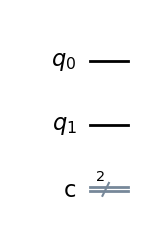

In [7]:
qc00.draw("mpl")

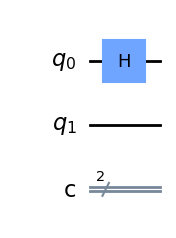

In [8]:
qc01.draw("mpl")

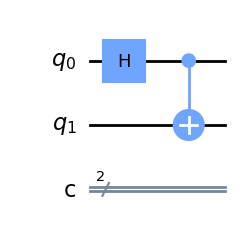

In [9]:
qc02.draw("mpl")

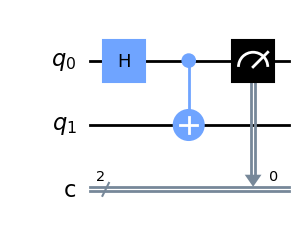

In [10]:
qc03.draw("mpl")

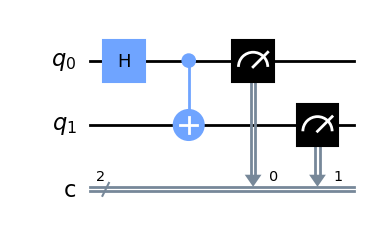

In [11]:
qc04.draw("mpl")

In [12]:
service = QiskitRuntimeService()
backend = service.least_busy(simulator=True,operational=True) # Run on the least-busy backend you have access to
# backend = service.least_busy(simulator=False,operational=True) # Run on the least-busy backend you have access to
# backend = service.get_backend("ibmq_qasm_simulator")
sampler = Sampler(backend)                                     # Create a Sampler object
job = sampler.run(qc04)                                        # Submit the circuit to the sampler

SamplerResult(quasi_dists=[{3: 0.50775, 0: 0.49225}], metadata=[{'shots': 4000}])

In [13]:
job.result()                                                   # Once the job is complete, get the result

SamplerResult(quasi_dists=[{3: 0.50775, 0: 0.49225}], metadata=[{'shots': 4000}])

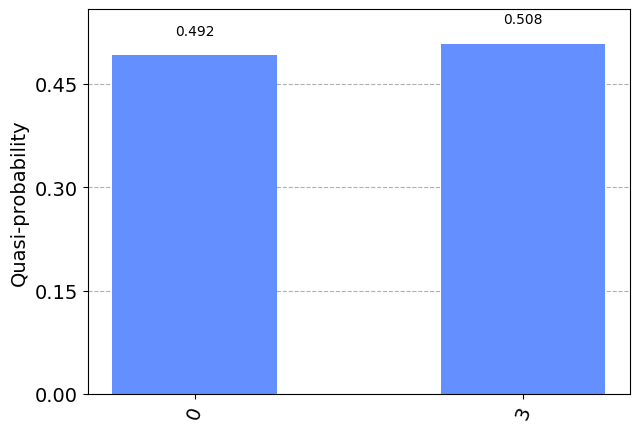

In [17]:
plot_histogram( job.result().quasi_dists )

In [18]:
import qiskit.tools.jupyter
%qiskit_version_table